## 首先读取数据文件，存到矩阵和向量数据结构中

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
CSV_FILE_PATH = 'ex1data1.txt'
df = pd.read_csv(CSV_FILE_PATH,header=None)
df = df.rename(columns = {0:'population',1:'profit'})
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


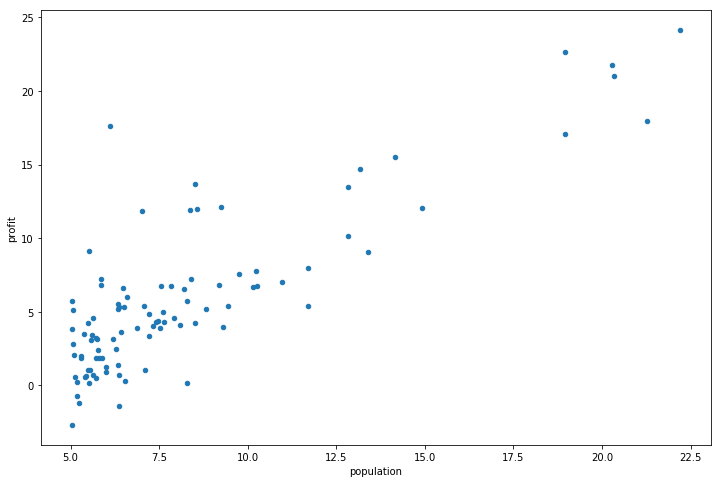

In [19]:
'''
population = df['population']
profit = df['profit']
plt.scatter(population, profit)
'''
df.plot(kind='scatter', x='population', y='profit', figsize=(12,8))
plt.show()



## 梯度下降


现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 
首先，我们将创建一个以参数θ为特征函数的代价函数 $$J\left( \theta \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$其中：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }{n}}{{x}_{n}}$$ 
注意：X为特征矩阵，theta为行向量，y为列向量

In [4]:
def ComputeCost(X,theta,y):
    data = np.power( (X.dot(theta.T)-y),2 )
    return  np.sum(data) / ( 2*len(X) )

在训练集中添加一列，以便使用向量化的解决方案来计算代价和梯度,对应公式中的x0

In [ ]:
df.insert( 0,'ones',1 )

初始化X，y，theta

In [165]:
X = df.iloc[:,0:-1]   #X为矩阵去除最后一列
y = df.iloc[:,-1:]    #y为最后一列的值
#将X，y转换为numpy中的matrix,theta也初始化为matrix
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

查看X，y，theta的维度

In [57]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

代价函数，theta初始值为0

In [61]:
ComputeCost(X,theta,y)

32.072733877455676


## batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta \right)$$
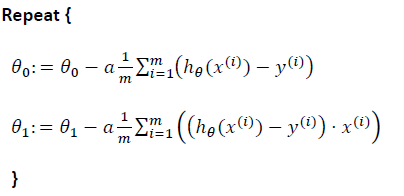  

下面这段代码不知为什么，如果直接通过  
temp = theta[0,j] - alpha * (np.sum(data) / len(X))  
theta[0,j] = temp  
则无法修改theta的值，theta一直为[0,0]  
一定要通过生成另外一个matrix，记录修改的值，再赋值给theta才行


In [5]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)     #记录每次的代价值
    for i in range(iters):
        error = X.dot( theta.T) -y
        for j in range(theta.shape[1]):
            data = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - alpha * (np.sum(data) / len(X))
        theta = temp    
        cost[i] = ComputeCost(X,theta,y)
    return theta,cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [177]:
alpha = 0.01
iters = 1000

运行梯度下降算法来将我们的参数θ适合于训练集。

In [184]:
g,cost = gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [186]:
ComputeCost(X,g,y)

4.515955503078912

## 绘制图形

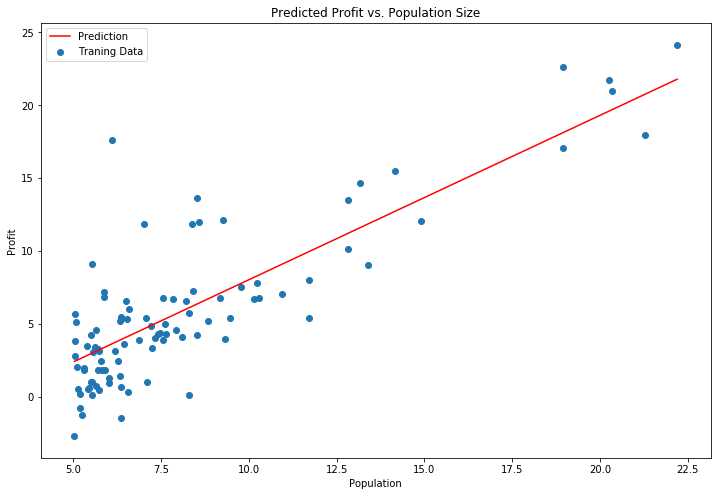

In [196]:
x = np.linspace(df.population.min(), df.population.max(), 100)    
f = g[0, 0] + (g[0, 1] * x)           #求出假设函数，对应图形中的直线
'''
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Traning Data')
ax.legend(loc=2)               #在左上角展示图例
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
'''
plt.figure(figsize=(12,8))
plt.plot(x, f, 'r', label='Prediction')
plt.scatter(df.population, df.profit, label='Traning Data')
plt.legend(loc=2)               #在左上角展示图例
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Predicted Profit vs. Population Size')

plt.show()

绘制代价

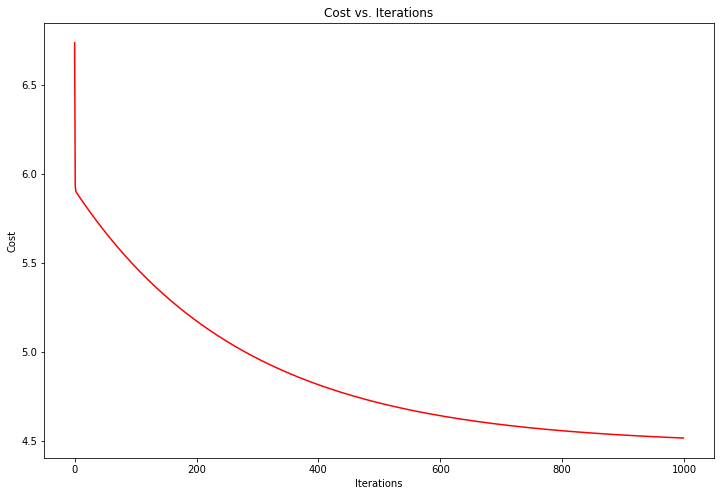

In [198]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters), cost, 'r', label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')

plt.show()

## 多变量线性回归  

In [199]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
CSV_FILE_PATH = 'ex1data2.txt'
df2 = pd.read_csv(CSV_FILE_PATH,header=None)
df2 = df2.rename(columns = {0:'size',1:'number of bedrooms',2:'price'})
df2.head()
#df2.describe()

,size,number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 特征缩放  
对于多变量线性回归，需要添加一个预处理步骤 - 特征归一化。  
如果缺少这个步骤，因为数值范围太大，会出现数据溢出等错误

In [3]:
df= (df2 - df2.mean()) / df2.std()
df.head()

,size,number of bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [ ]:
## 经过特征缩放之后，其他的步骤和单变量类似，两个函数也都可以使用

In [6]:
# add ones column
df.insert( 0,'ones',1 )
X = df.iloc[:,0:-1]   #X为矩阵去除最后一列
y = df.iloc[:,-1:]    #y为最后一列的值
#将X，y转换为numpy中的matrix,theta也初始化为matrix
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))
#初始化学习率和迭代次数
alpha = 0.01
iters = 1000
# perform linear regression on the data set
g,cost = gradientDescent(X,y,theta,alpha,iters)

# get the cost (error) of the model
ComputeCost(X,g,y)

0.13070336960771892

画图查看迭代过程

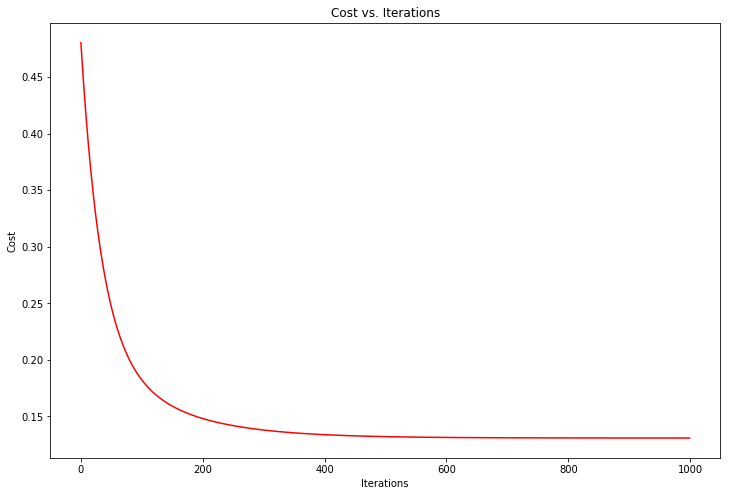

In [7]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters), cost, 'r', label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')

plt.show()

## 正规方程  
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。 上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型  
### 注意，对于matrix对象，矢量乘法可以使用.dot ,  matmul,  *,  @,  如果实现对应元素相乘使用multiply。但是对于array对象，*表示的是对应元素相乘

In [8]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [10]:
g2 = normalEqn(X,y)
print(g,g2)

[[-1.10957343e-16  8.78503652e-01 -4.69166570e-02]] [[-1.04083409e-16]
 [ 8.84765988e-01]
 [-5.31788197e-02]]
